In [1]:
# Importing Important libraries
import numpy as np # For Scientific Computation
import matplotlib
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Fetching of data
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [4]:
# Retrieving features and labels
X = mnist['data']
Y = mnist['target']

In [5]:
# Converting into NumPy array with integer datatype
X = np.array(X , dtype = 'int32')
Y = np.array(Y , dtype = 'int32')

In [6]:
# Reshaping
Y = Y.reshape(1,70000)
X = X.reshape(70000,-1).T
print(X.shape)

(784, 70000)


In [7]:
Lets_plot = X[:,60000]
Lets_plot_image = Lets_plot.reshape(28,28)
print(Lets_plot_image.shape)

(28, 28)


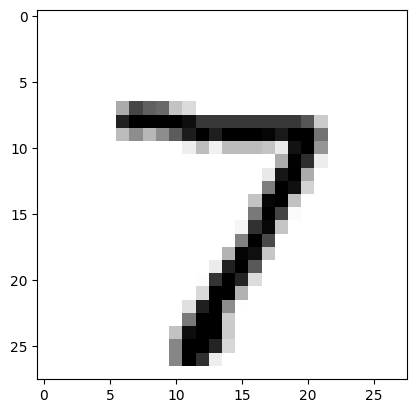

In [8]:
plt.imshow(Lets_plot_image, cmap = matplotlib.cm.binary, interpolation = "nearest")

In [9]:
Y[:,60000]

array([7], dtype=int32)

In [10]:
X_train = X[:,:60000]
X_test  = X[:,60000:]
Y_train = Y[:,:60000]
Y_test  = Y[:,60000:]
X_train = X_train
X_test = X_test
print(X_train.shape)
X_train = X_train / 255
X_test = X_test / 255

(784, 60000)


In [11]:
def initialize_parameters():
  W1 = np.random.randn(16,784) * 0.01
  W2 = np.random.randn(10,16)  * 0.01
  b1 = np.zeros((16,1))
  b2 = np.zeros((10,1))
  # parameters = {
  #     "W1": W1,
  #     "b1": b1,
  #     "W2": W2,
  #     "b2": b2}
  return W1, b1, W2, b2


In [12]:
def ReLU(Z):
  return np.maximum(Z, 0)

def SoftMax(Z2):
  A = np.exp(Z2) / np.sum(np.exp(Z2), axis = 0, keepdims = True)
  return A

def forward_propagation(W1, b1, W2, b2,X):
  Z1 = np.dot(W1,X) + b1
  A1 = ReLU(Z1)
  Z2 = np.dot(W2,A1) + b2
  Z2 = np.float128(Z2)
  A2 = SoftMax(Z2)
  return Z1, A1, Z2, A2


In [13]:

def compute_cost(A2, Y):
  m = Y.size
  cost = -1/m * np.sum(np.dot(Y,np.log(A2).T) + np.dot((1-Y),np.log(1-A2).T))
  return cost

In [14]:
def one_hot(Y):
  encoded_array = np.zeros((Y.size, Y.max() + 1))
  encoded_array[np.arange(Y.size), Y] = 1
  encoded_array = encoded_array.T
  return encoded_array

def relu_derivative(Z):
  return Z >= 0

def backward_propagation(Z1, A1, Z2, A2, W2, X, Y):
  m = Y.size
  one_hot_Y = one_hot(Y)
  dZ2 = A2 - one_hot_Y
  dW2 = 1/m * np.dot(dZ2,A1.T)
  db2 = 1/m * np.sum(dZ2, axis = 1, keepdims = True)
  dZ1 = np.dot(W2.T, dZ2) * relu_derivative(Z1)
  dW1 = 1/m * np.dot(dZ1,X.T)
  db1 = 1/m * np.sum(dZ1,axis = 1, keepdims = True)
  return dW1, db1, dW2, db2


In [15]:
def update_parameters(W1, b1, W2, b2, dW1, db1, dW2, db2, Learning_rate):
  # W1 = parameters["W1"]
  # W2 = parameters["W2"]
  # b1 = parameters["b1"]
  # b2 = parameters["b2"]
  W1 = W1 - Learning_rate * dW1
  W2 = W2 - Learning_rate * dW2
  b1 = b1 - Learning_rate * db1
  b2 = b2 - Learning_rate * db2
  # parameters["W1"] = W1
  # parameters["W2"] = W2
  # parameters["b1"] = b1
  # parameters["b2"] = b2
  return W1, b1, W2, b2

In [16]:
def get_predictions(A2):
  return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
  print(predictions, Y)
  return np.sum(predictions == Y)/ Y.size

def Gradient_Descent(X, Y, No_Of_Iterations, Learning_Rate):
  W1, b1, W2, b2 = initialize_parameters()

  for i in range(0, No_Of_Iterations):
    Z1, A1, Z2, A2 = forward_propagation(W1, b1, W2, b2, X)
    cost = compute_cost(A2, Y)
    dW1, db1, dW2, db2 = backward_propagation(Z1, A1, Z2, A2, W2, X, Y)
    W1, b1, W2, b2 = update_parameters(W1, b1, W2, b2, dW1, db1, dW2, db2, Learning_Rate)
    if i% 10 == 0:
      print("Cost after " + str(i) + "th Iteration is " + str(cost))
    if i % 10 == 0 or i == No_Of_Iterations:
      print("Iterations: " + str(i))
      predictions = get_predictions(A2)
      print("Accuracy  :" + str(get_accuracy(predictions, Y)))

  return W1, b1, W2, b2, cost

In [17]:
W1, b1, W2, b2, cost = Gradient_Descent(X_train, Y_train, 500, 0.1)

Cost after 0th Iteration is 98.916686037468436014
Iterations: 0
[3 2 3 ... 3 3 3] [[5 0 4 ... 5 6 8]]
Accuracy  :0.05675
Cost after 10th Iteration is 98.91735394380567808
Iterations: 10
[3 1 1 ... 1 1 1] [[5 0 4 ... 5 6 8]]
Accuracy  :0.14061666666666667
Cost after 20th Iteration is 98.918808133407523576
Iterations: 20
[6 1 1 ... 1 1 1] [[5 0 4 ... 5 6 8]]
Accuracy  :0.17776666666666666
Cost after 30th Iteration is 98.92137541644367953
Iterations: 30
[6 1 1 ... 1 6 1] [[5 0 4 ... 5 6 8]]
Accuracy  :0.2669166666666667
Cost after 40th Iteration is 98.928713673852889575
Iterations: 40
[6 6 3 ... 9 6 1] [[5 0 4 ... 5 6 8]]
Accuracy  :0.3137333333333333
Cost after 50th Iteration is 98.96007650456410244
Iterations: 50
[6 6 6 ... 9 6 6] [[5 0 4 ... 5 6 8]]
Accuracy  :0.2997166666666667
Cost after 60th Iteration is 99.097977396772943655
Iterations: 60
[6 6 6 ... 9 6 6] [[5 0 4 ... 5 6 8]]
Accuracy  :0.2769333333333333
Cost after 70th Iteration is 99.604841838854195034
Iterations: 70
[6 0 4 ...

In [18]:
Z1, A1, Z2, A2 = forward_propagation(W1, b1, W2, b2, X_test)
predictions = get_predictions(A2)
print("Accuracy  :" + str(get_accuracy(predictions, Y_test)))

[7 2 1 ... 4 5 6] [[7 2 1 ... 4 5 6]]
Accuracy  :0.8964
